# Import Packages and Functions

We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization

Run the next cell to import all the necessary packages.

In [6]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("C:/Users/karth/Desktop/project/chest_xray")

['chest_xray', 'test', 'train', 'val', '__MACOSX']

In [9]:
len(os.listdir("C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


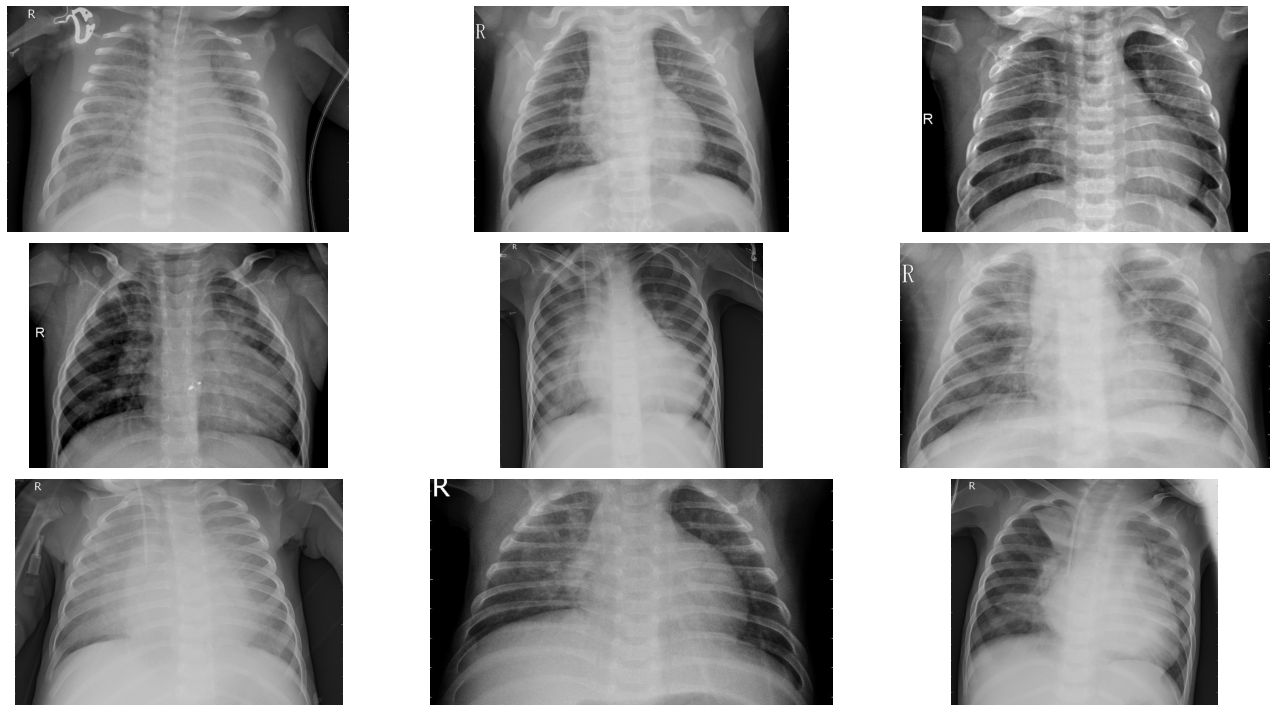

In [12]:
train_dir = "C:/Users/karth/Desktop/project/chest_xray/chest_xray/train"
test_dir = "C:/Users/karth/Desktop/project/chest_xray/chest_xray/test"
val_dir = "C:/Users/karth/Desktop/project/chest_xray/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/PNEUMONIA")
pneumonia_dir = "C:/Users/karth/Desktop/project/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

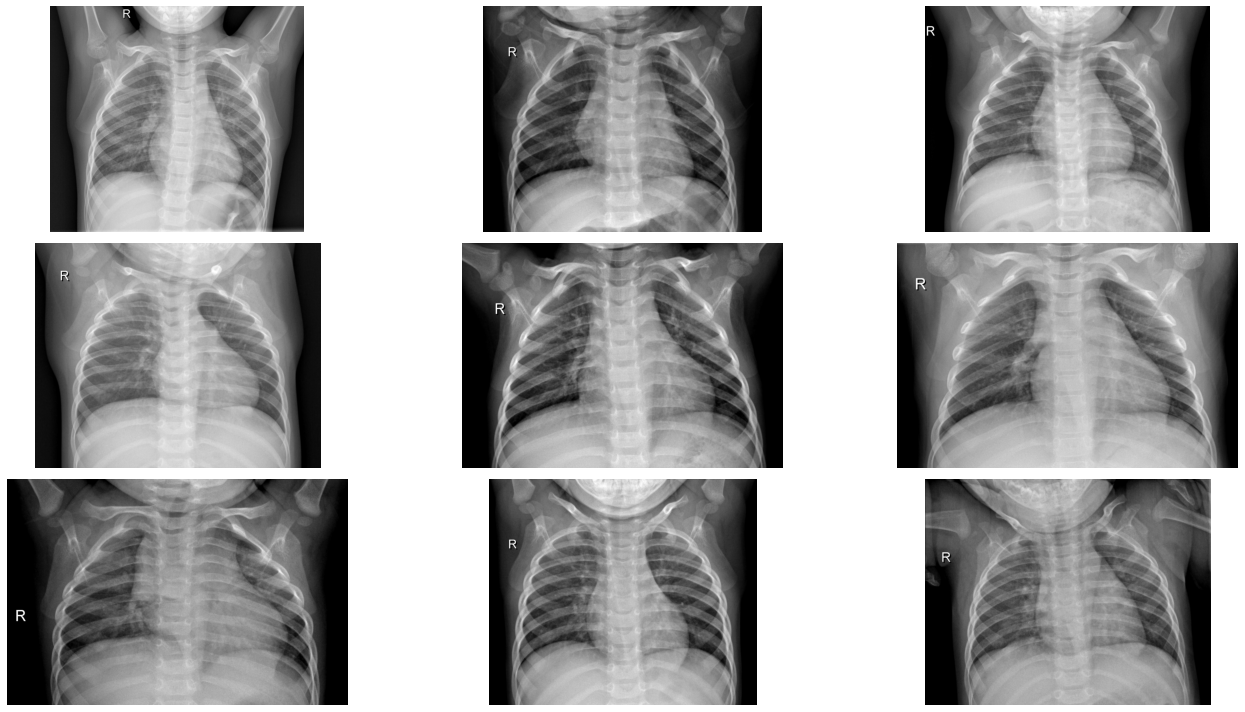

In [13]:
normal = os.listdir("C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/NORMAL")
normal_dir = "C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1858 pixels width and 2090 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 128.9075 and the standard deviation is 62.3010


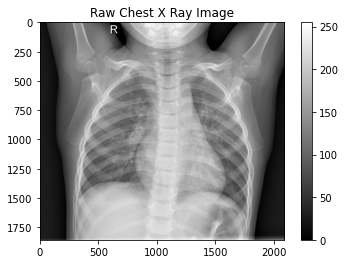

In [15]:
normal_img = os.listdir("C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/NORMAL")[0]
normal_dir = "C:/Users/karth/Desktop/project/chest_xray/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

Text(0, 0.5, '# Pixels in Image')

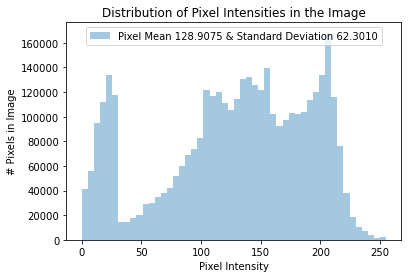

In [16]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Image Preprocessing

Before training, we willll first modify your images to be better suited for training a convolutional neural network. For this task we will use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images. We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution). The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [17]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

Using TensorFlow backend.


In [18]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.5598 and the minimum is -3.4090
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


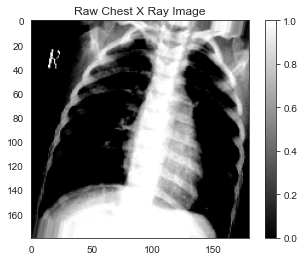

In [19]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

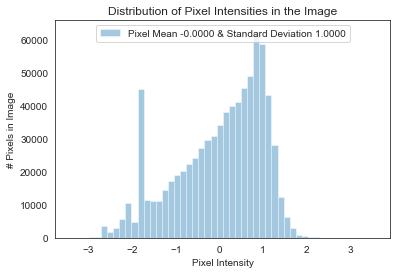

In [20]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [21]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


# Building a CNN model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 86, 86, 64)       

# Training the CNN Model

In [24]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 226s 2s/step - loss: 0.9305 - accuracy: 0.8112 - val_loss: 0.0000e+00 - val_accuracy: 0.3600
Epoch 2/10
100/100 [==============================] - 205s 2s/step - loss: 0.4003 - accuracy: 0.8300 - val_loss: 34.4691 - val_accuracy: 0.6000
Epoch 3/10
100/100 [==============================] - 202s 2s/step - loss: 0.2347 - accuracy: 0.8512 - val_loss: 8.0150e-14 - val_accuracy: 0.4400
Epoch 4/10
100/100 [==============================] - 209s 2s/step - loss: 0.1206 - accuracy: 0.8825 - val_loss: 13.1509 - val_accuracy: 0.5200
Epoch 5/10
100/100 [==============================] - 204s 2s/step - loss: 0.1107 - accuracy: 0.9050 - val_loss: 2.2855e-08 - val_accuracy: 0.6000
Epoch 6/10
100/100 [==============================] - 185s 2s/step - loss: 0.1518 - accuracy: 0.8800 - val_loss: 4.2870 - val_accuracy: 0.5200
Epoch 7/10
100/100 [==============================] - 189s 2s/step - loss: 0.1225 - accuracy: 0.8925 - val_loss: 4.5048 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

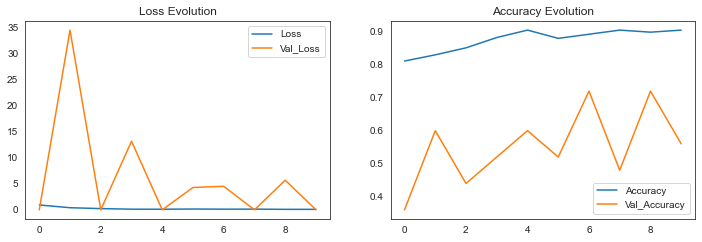

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [26]:

evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 40s 65ms/step
Test Accuracy: 80.77%
652/652 [==============================] - 365s 560ms/step
Train Accuracy: 92.87%


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[141  93]
 [ 24 366]]


,0,1,accuracy,macro avg,weighted avg
f1-score,0.706767,0.862191,0.8125,0.784479,0.803907
precision,0.854545,0.797386,0.8125,0.825966,0.818821
recall,0.602564,0.938462,0.8125,0.770513,0.812500
support,234.000000,390.000000,0.8125,624.000000,624.000000


In [28]:

print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[156  78]
 [ 31 359]]


,0,1,accuracy,macro avg,weighted avg
f1-score,0.741093,0.868198,0.825321,0.804645,0.820534
precision,0.834225,0.821510,0.825321,0.827867,0.826278
recall,0.666667,0.920513,0.825321,0.793590,0.825321
support,234.000000,390.000000,0.825321,624.000000,624.000000


CNN-2 Model is done and predicted in the next jupyter notebook file.

# Transfer Learning

# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

In [29]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29089792/29084464 [==============================] - 6s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
_______________________

In [30]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [31]:

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [32]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Training the DenseNet model

In [33]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 462s 5s/step - loss: 0.1659 - accuracy: 0.8338 - val_loss: 7.1858e-04 - val_accuracy: 0.5600
Epoch 2/10
100/100 [==============================] - 409s 4s/step - loss: 0.1056 - accuracy: 0.8838 - val_loss: 5.9731e-05 - val_accuracy: 0.8000
Epoch 3/10
100/100 [==============================] - 409s 4s/step - loss: 0.0924 - accuracy: 0.8925 - val_loss: 0.0257 - val_accuracy: 0.8000
Epoch 4/10
100/100 [==============================] - 409s 4s/step - loss: 0.0865 - accuracy: 0.9050 - val_loss: 2.2122e-04 - val_accuracy: 0.5200
Epoch 5/10
100/100 [==============================] - 408s 4s/step - loss: 0.0878 - accuracy: 0.9112 - val_loss: 1.2703 - val_accuracy: 0.4800
Epoch 6/10
100/100 [==============================] - 409s 4s/step - loss: 0.0846 - accuracy: 0.9087 - val_loss: 8.6420e-04 - val_accuracy: 0.5600
Epoch 7/10
100/100 [==============================] - 408s 4s/step - loss: 0.0929 - accuracy: 0.8988 - val_loss: 0.5162 - val_

Text(0.5, 1.0, 'Accuracy Evolution')

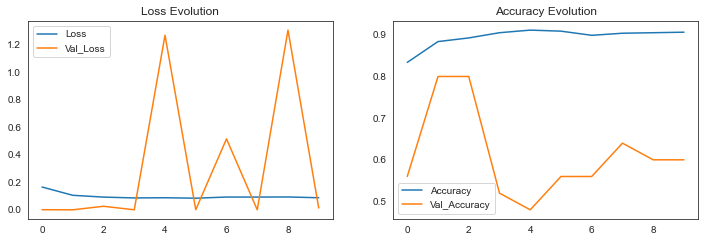

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [35]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 654s 1s/step
Test Accuracy: 87.66%
652/652 [==============================] - 2598s 4s/step
Train Accuracy: 93.00%


In [36]:
predicted_vals = model.predict(test, steps=len(test))

In [37]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[175  59]
 [ 17 373]]


,0,1,accuracy,macro avg,weighted avg
f1-score,0.821596,0.907543,0.878205,0.864569,0.875313
precision,0.911458,0.863426,0.878205,0.887442,0.881438
recall,0.747863,0.956410,0.878205,0.852137,0.878205
support,234.000000,390.000000,0.878205,624.000000,624.000000


# VGG16

Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

In [38]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 4s 0us/step


In [39]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 180, 180, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [40]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])

In [47]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

# Training the Vgg16 model

In [48]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 462s 5s/step - loss: 0.2375 - accuracy: 0.6650 - precision: 0.8617 - recall: 0.5732 - val_loss: 18.4370 - val_accuracy: 0.6400 - val_precision: 0.9012 - val_recall: 0.6178
Epoch 2/10
100/100 [==============================] - 467s 5s/step - loss: 0.2265 - accuracy: 0.6938 - precision: 0.8908 - recall: 0.6269 - val_loss: 6.4055 - val_accuracy: 0.6000 - val_precision: 0.8887 - val_recall: 0.6394
Epoch 3/10
100/100 [==============================] - 475s 5s/step - loss: 0.1895 - accuracy: 0.7663 - precision: 0.8947 - recall: 0.6561 - val_loss: 0.0056 - val_accuracy: 0.4800 - val_precision: 0.8946 - val_recall: 0.6731
Epoch 4/10
100/100 [==============================] - 479s 5s/step - loss: 0.1824 - accuracy: 0.7638 - precision: 0.8990 - recall: 0.6815 - val_loss: 4.3947 - val_accuracy: 0.5200 - val_precision: 0.9050 - val_recall: 0.6873
Epoch 5/10
100/100 [==============================] - 490s 5s/step - loss: 0.1769 - accuracy: 0.793

Text(0.5, 1.0, 'Accuracy Evolution')

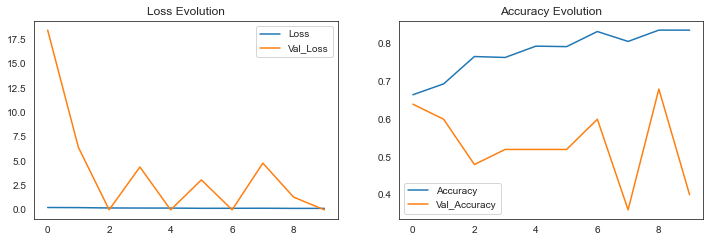

In [49]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [50]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 116s 186ms/step
Test Accuracy: 62.50%


In [51]:
evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

652/652 [==============================] - 859s 1s/step
Train Accuracy: 74.31%


# Build with ResNet50 model

In [52]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

C:\Users\karth\Anaconda3\envs\final\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step


In [53]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 90, 90, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [55]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

# Training the model

In [56]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 404s 4s/step - loss: 0.3035 - accuracy: 0.6325 - precision: 0.8233 - recall: 0.5522 - val_loss: 52.1417 - val_accuracy: 0.6400 - val_precision: 0.8415 - val_recall: 0.6105
Epoch 2/10
100/100 [==============================] - 390s 4s/step - loss: 0.2684 - accuracy: 0.6712 - precision: 0.8471 - recall: 0.6249 - val_loss: 0.0000e+00 - val_accuracy: 0.4000 - val_precision: 0.8514 - val_recall: 0.6265
Epoch 3/10
100/100 [==============================] - 393s 4s/step - loss: 0.2488 - accuracy: 0.6725 - precision: 0.8576 - recall: 0.6284 - val_loss: 7.9080e-07 - val_accuracy: 0.4400 - val_precision: 0.8576 - val_recall: 0.6321
Epoch 4/10
100/100 [==============================] - 395s 4s/step - loss: 0.2513 - accuracy: 0.6725 - precision: 0.8527 - recall: 0.6378 - val_loss: 8.2418 - val_accuracy: 0.5200 - val_precision: 0.8530 - val_recall: 0.6411
Epoch 5/10
100/100 [==============================] - 391s 4s/step - loss: 0.2364 - accurac

Text(0.5, 1.0, 'Accuracy Evolution')

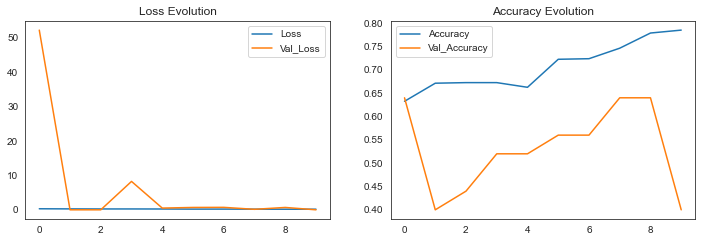

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [58]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 115s 184ms/step
Test Accuracy: 62.50%
652/652 [==============================] - 827s 1s/step
Train Accuracy: 74.19%


# InceptionNet

Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters.

In [59]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 6s 0us/step


In [60]:
inception_model = Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

# Training the model

In [61]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)

Epoch 1/10
100/100 [==============================] - 262s 3s/step - loss: 0.2933 - accuracy: 0.6037 - precision: 0.8194 - recall: 0.5570 - val_loss: 3.1156 - val_accuracy: 0.6400 - val_precision: 0.8384 - val_recall: 0.5866
Epoch 2/10
100/100 [==============================] - 250s 2s/step - loss: 0.2077 - accuracy: 0.7175 - precision: 0.8568 - recall: 0.6085 - val_loss: 0.0202 - val_accuracy: 0.4000 - val_precision: 0.8676 - val_recall: 0.6311
Epoch 3/10
100/100 [==============================] - 228s 2s/step - loss: 0.2109 - accuracy: 0.7713 - precision: 0.8808 - recall: 0.6511 - val_loss: 1.5322 - val_accuracy: 0.5600 - val_precision: 0.8881 - val_recall: 0.6666
Epoch 4/10
100/100 [==============================] - 239s 2s/step - loss: 0.2585 - accuracy: 0.6762 - precision: 0.8784 - recall: 0.6707 - val_loss: 12565.5752 - val_accuracy: 0.5200 - val_precision: 0.8722 - val_recall: 0.6766
Epoch 5/10
100/100 [==============================] - 238s 2s/step - loss: 0.2368 - accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

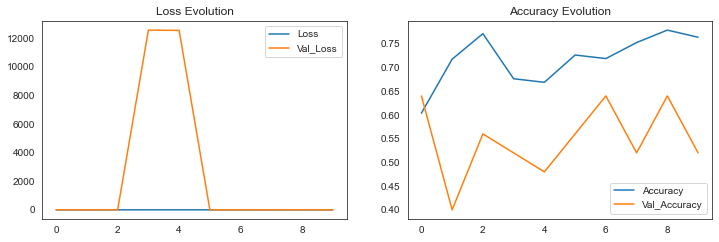

In [62]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [63]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 119s 191ms/step
Test Accuracy: 71.47%
652/652 [==============================] - 468s 719ms/step
Train Accuracy: 88.40%


# Comparig Different Models

In [7]:

model_mae_scores_dict = {'CNN1': 80.77,'CNN2': 95.70,'DenseNet' : 87.66, 'VGG16' : 62.50, 'ResNet' : 62.50, 'InceptionNet' : 71.47}

In [9]:
import pandas as pd
model_mae_scores = pd.Series(model_mae_scores_dict)

In [10]:
model_mae_scores

CNN1            80.77
CNN2            95.70
DenseNet        87.66
VGG16           62.50
ResNet          62.50
InceptionNet    71.47
dtype: float64